In [163]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [164]:
class Graph:
    def __init__(self, matr: list):
        self.graph = matr
        self.adjacency_matrix = [[]]
        self.list_adjacency = {}
        
    @classmethod
    def init_by_adjacency_list(cls, list1):
        x = cls(list1)
        return x
        
    @classmethod
    def init_by_adjacency_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix)):
            for j in range(i):
                if matrix[i][j] == 1:
                    graph[i].append(j)
                    graph[j].append(i)
        x = cls(graph)
        return x
        
    @classmethod
    def init_by_incendent_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix[0])):
            cnt = []
            for j in range(len(matrix)):
                if matrix[j][i] == 1:
                     cnt.append(j)
            cnt1 = cnt.pop()
            cnt2 = cnt.pop()
            graph[cnt1].append(cnt2)
            graph[cnt2].append(cnt1)
        x = cls(graph)
        return x
    
    @classmethod
    def init_by_edges_list(cls, list_pairs: list):
        edges = 0
        graph = []
        for i in range(len(list_pairs)):
            if list_pairs[i][0] > edges:
                edges = list_pairs[i][0]
            if list_pairs[i][1] > edges:
                edges = list_pairs[i][1]
        edges += 1
        for i in range(edges):
            graph.append([])
        for i in range(len(list_pairs)):
            graph[list_pairs[i][0]].append(list_pairs[i][1])
            graph[list_pairs[i][1]].append(list_pairs[i][0])
        x = cls(graph)
        return x

    def _init_list_adjacency(self):
        self.list_adjacency = {}
        for i in range(self.count_vert):
            self.list_adjacency.update({i: []})

    def list_adjacency_from_matix_adjacency(self):
        self.count_vert = len(self.adjacency_matrix[0])
        self._init_list_adjacency()
        for i in range(self.count_vert):
            for j in range(self.count_vert):
                if self.adjacency_matrix[i][j] > 0:
                    self.list_adjacency.get(i).append(j)
        
    def add_arc(self, u: int, v: int):
        self.graph[u].append(v)
        
    def del_arc(self, u: int, v: int):
        self.graph[u].remove(v)
        self.graph[v].remove(u)
    
    def add_vertex(self):
        self.graph.append(len(self.graph))
        
    def del_vertex(self, vertex: int):
        self.graph.pop(vertex)
        
    def get_graph_by_adjacency_list(self):
        return self.graph
    
    def get_graph_by_adjacency_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
        for i in range(len(self.graph) - 1):
            for j in range(len(self.graph[i])):
                matr[i][self.graph[i][j]] = 1
                matr[self.graph[i][j]][i] = 1
        return matr
    
    
    def get_graph_by_incendent_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
            
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i]) - 1):
                matr[i][self.graph[i][j]] = 1
                
        return matr
    
    def find_medians(self):
        matr = self.get_graph_by_adjacency_matrix()
        matr_ways = []
        rez = []
        for i in range(len(matr)):
            for j in range(len(matr)):
                if matr[i][j] == 0:
                    matr[i][j] = len(matr) + 10

        for i in range(len(matr)):
             matr_ways.append([])
                
        for i in range(len(matr)):
            for j in range(len(matr)):
                matr_ways[i].append(j)
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                for k in range(len(matr)):
                    if matr[i][k] != (len(matr) + 10) and matr[k][j] != (len(matr) + 10) and matr[i][k] + matr[k][j] < matr[i][j]:
                        matr[i][j] = matr[i][k] + matr[k][j]
                        matr_ways[i][j] = matr_ways[i][k]
                        
                        
        minimum = len(matr) * len(matr)
        cnt = 0
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum > cnt:
                minimum = cnt
            cnt = 0
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum == cnt:
                rez.append(i)
            cnt = 0
                
        return rez
    
    def get_graph_by_edges_list(self):
        matr = []
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i])):
                matr.append((i, self.graph[i][j]))
        return matr
    
    def print_graph(graph):
            print(graph)
    
    def get_graph(self):
        return self.graph        
        
    def __del__(self):
        print()

    def dfs_path(self, s):
        self.DFS(s)

    def DFS(self, start_vert):
        visited = set()
        self.DFSmaker(start_vert, visited)

    def DFSmaker(self, v, visited):
        visited.add(v)
        for neighbour in self.list_adjacency[v]:
            if neighbour not in visited:
                print(str(v) + "->" + str(neighbour), end=' ')

                self.DFSmaker(neighbour, visited)
                print(str(neighbour) + '->' + str(v), end=' ')

    def diykstra(self):
        A = np.array(self.adjacency_matrix)
        G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
        print(nx.dijkstra_path(G, 0, 3))


In [165]:
def draw_graph(graph, nodes = []):
    G = nx.Graph()
    for i in range(len(graph) - 1):
        G.add_node(i)
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            G.add_edge(i, graph[i][j])
    nx.draw_shell(G, nlist=[range(len(graph)), range(len(graph))], with_labels=True, 
                  font_weight='bold', node_size = 1200)
    nx.draw_shell(G, nlist=[range(len(graph)), range(len(graph))], with_labels=True, nodelist = nodes, node_color="red",
                  font_weight='bold', node_size = 1200)


[0, 4, 3]
0->1 1->2 2->1 1->0 0->4 4->3 3->4 4->0 

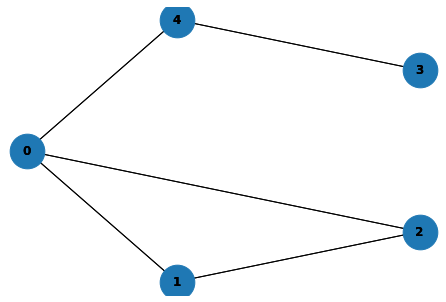

In [166]:
adjacency_matrix = [
    [0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0]]

gr1 = Graph.init_by_adjacency_matrix(adjacency_matrix)
gr1.adjacency_matrix = adjacency_matrix
gr1.list_adjacency_from_matix_adjacency()
gr1.diykstra()
gr1.dfs_path(0)
draw_graph(gr1.get_graph())